<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP4/Pr%C3%A1ctico_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 4

Creado por: Lara Negri

## Descripción del práctico

El trabajo consiste en generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo.\
Se debe mostrar el histograma respectivo para 5 valores de contadores diferentes.

Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante).\
Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.

Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.

## Librerias requeridas

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as io

## Funciones a utlizar

In [2]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im
  
  # Obtener el canal R normalizado de una imagen
def get_R(im):
  R = im[:, :, 0]
  return R

  # Obtener el canal G normalizado de una imagen
def get_G(im):
  G = im[:, :, 1]
  return G

  # Obtener el canal B normalizado de una imagen
def get_B(im):
  B = im[:, :, 2]
  return B

def rgb_to_image(newR,newG,newB):
  Shape = newR.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = newR
  im_out[:,:,1] = newG
  im_out[:,:,2] = newB
  return im_out.astype(np.uint8)

def plot_finalim(newR,newG,newB):
  finalim = rgb_to_image(newR,newG,newB)
  plt.imshow(finalim)
  plt.show()

## Cargar imagen con problema de luminancia

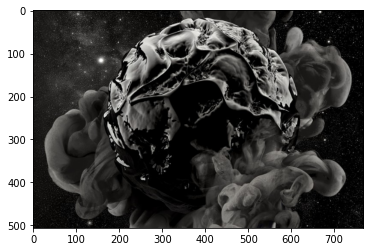

In [8]:
#@title Copie el link a su imagen
image = 'https://www.xlsemanal.com/wp-content/uploads/sites/3/2018/04/materiaprolongada-ok-768x506.jpg' #@param {type:"string"}

im = get_image(image)
plt.imshow(im) 
plt.show()

## Generamos la función que nos va a devolver el histograma de la imagen

En primer lugar obtengo la luminancia de la imagen.

Una vez obtenido esto, defino cómo van a funcionar los distintos filtros que puede aplicar el usuario.
Para el caso de la función de lineal a trozos defino los distintos parámetros necesarios y recorro la matriz Y para poder aplicar la función.

Pasando nuevamente al espacio RGB se puede plotear la imagen editada.

Luego, cuento cuántos valores de Y caen en cada rango de luminancia seleccionada, y ploteo el histograma de la imagen. Se presenta también el histograma generado por np.histogram para mostrar que el creado por el código devuelve un resultado correcto.

In [12]:
def get_histogram(im, alfa, bins, filtro, Ymin, Ymax):
  #Primero necesito los valores de R, G, B de las imágenes

  R = get_R(im)/255
  G = get_G(im)/255
  B = get_B(im)/255

  #Obtengo los valores de YIQ
  Y = (0.299*R + 0.587*G + 0.114*B)*alfa
  I = 0.595716*R + -0.274453*G + -0.321263*B
  Q = 0.211456*R + -0.522591*G + 0.311135*B

  Y = np.array(np.clip(Y, 0, 1))

  #Defino el tamaño de la matriz porque después necesito recorrerla
  x, z = Y.shape

  #defino los parámetros para la función a trozos
  a = 1/(Ymax - Ymin)
  b = -Ymin /(Ymax - Ymin)

  #Defino los distintos filtros que se pueden aplicar
  if filtro == 'sin filtro':
    Y = Y
  elif filtro == 'lineal a trozos':
    for i in range(x):
      for j in range(z):
        if Y[i,j] < Ymin:
          Y[i,j] = 0
        elif Y[i,j] > Ymax:
          Y[i,j] = 1
        else:
          Y[i,j] = a*Y[i,j] +b
  elif filtro == 'raiz':
    Y = Y**0.5
  elif filtro == 'cuadrada':
    Y = Y*Y

  #Transformo los valores nuevamente al espacio RGB para poder plotear la imagen
  newR = (Y + 0.9663*I + 0.6210*Q)*255
  newG = (Y -0.2721*I -0.6474*Q)*255
  newB = (Y -1.1070*I + 1.7046*Q)*255

  newR = np.clip(newR, 0, 255)
  newG = np.clip(newG, 0, 255)
  newB = np.clip(newB, 0, 255)

  #ploteo la imagen final
  rgb_to_image(newR,newG,newB)
  plt.title('Imagen')
  plot_finalim(newR,newG,newB)

  #Defino una función que me genere distintas cantidades de bins
  step1 = 0.1
  step2 = 0.2
  step3 = 0.05
  step4 = 0.02
  step5 = 0.01

  n1 = np.arange(0,1,0.1)
  n2 = np.arange(0,1,0.2)
  n3 = np.arange(0,1,0.05)
  n4 = np.arange(0,1,0.02)
  n5 = np.arange(0,1,0.01)

  if bins == 5:
    n = n2
    step = step2
  elif bins == 10:
    n = n1
    step = step1
  elif bins == 20:
    n = n3
    step = step3
  elif bins == 50:
    n = n4
    step = step4
  elif bins == 100:
    n = n5
    step = step5

  #Genero el histograma
  histogram = []
  for value in n:
    trueY = np.logical_and(Y>=value,Y<=value+step)
    trueY
    histogram.append(np.sum (trueY == True))

  print(histogram)
  plt.bar(n,histogram, width=n[1]-n[0])
  plt.title('Histograma propio')
  plt.show()

  his, bins2 = np.histogram(Y, int(bins),range=[0,1])

  print(his)

  plt.bar((bins2[1:] + bins2[:-1])/2, his, width=bins2[1]-bins2[0])
  plt.title('Histograma usando np.histogram')
  plt.show()

A continuación se presenta la imagen original junto con su histograma.

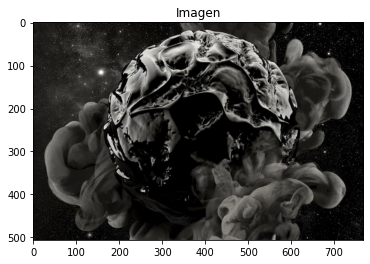

[122104, 48759, 52816, 37067, 29645, 22801, 16499, 11083, 9387, 8751, 7121, 4732, 3993, 3884, 3466, 2843, 2106, 1360, 241, 52]


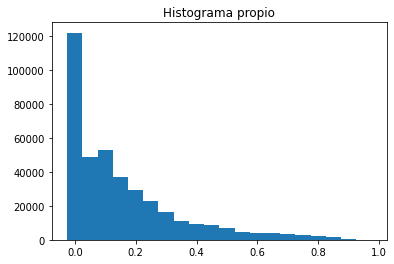

[122104  48759  52816  36984  29645  22801  16499  11066   9387   8751
   7121   4732   3993   3884   3466   2841   2106   1360    241     52]


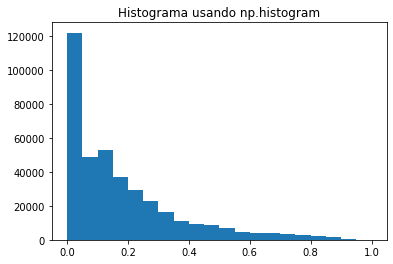

In [17]:
#Realizamos el histograma de la imagen original y comparamos con el generado por np.histogram
get_histogram(im, 1, 20, 'sin filtro', 0.1, 0.5)

Finalmente, el usuario puede editar la imagen con el filtro que crea acorde y obtener la imagen final junto con su histograma. 

Para esto, debe ejecutar la celda siguiente, cargando los parámetros según corresponda:

get_histogram(im, 1, 10, 'sin filtro', 0.1, 0.5)

1.   1er parámetro: imagen, debe dejarse la palabra im cómo está. Para cambiar la imagen ir a la sección de Carga de Imagen
2.   2do parámetro: alfa, probar con distintos valores y verificar que el problema de luminancia de la imagen no se corrige. La imagen original corresponde a alfa = 1.
3. 3er parámetro: número de bins. Se puede seleccionar las opciones 5, 10, 20, 50, 100 según el usuario desee. 
4. 4to parámetro: filtro, se pueden seleccionar las opciones 'sin filtro', 'raiz', 'lineal a trozos', 'cuadrada'. La opción deseada debe escribirse entre '' y de la misma forma que se presenta anteriormente.
5. 5to y 6to parámetro: Ymin e Ymax, corresponden a los valores límites con los que trabaja el filtro 'lineal a trozos'. Si se va a trabajar con otro filtro no es necesario modificarlos. En el caso de trabajar con el filtro 'lineal a trozos' pueden modificarse tomando valores entre 0 y 1 según el usuario desee.



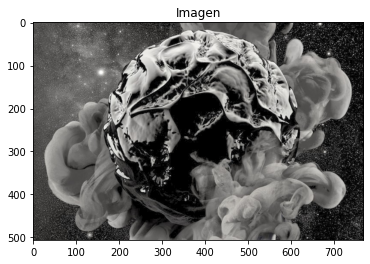

[53094, 4351, 1236, 11047, 8563, 6884, 6481, 8735, 8008, 7021, 6526, 6313, 9527, 6777, 11245, 19902, 12617, 12382, 15726, 14287, 12900, 14143, 10597, 11376, 10570, 10034, 9698, 7936, 7187, 6477, 5745, 5230, 5216, 4668, 4727, 4674, 3638, 3141, 2846, 2541, 2324, 2588, 2255, 2231, 1836, 1505, 1256, 424, 77, 46]


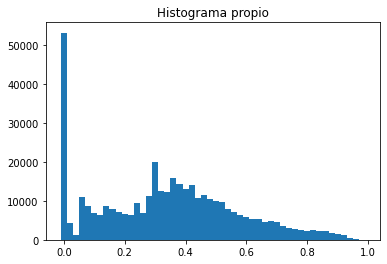

[53094  4351  1236 11047  8563  6884  6481  8735  8008  7021  6526  6313
  9527  6777 11245 19902 12617 12382 15726 14287 12900 14143 10597 11376
 10570 10034  9698  7936  7187  6477  5745  5230  5216  4668  4727  4674
  3638  3141  2846  2541  2324  2588  2255  2231  1836  1505  1256   424
    77    46]


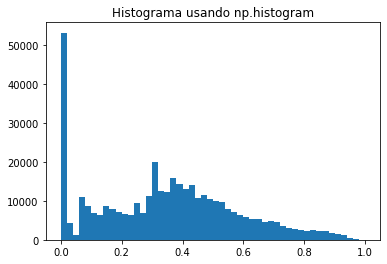

In [14]:
get_histogram(im, 1, 50, 'raiz', 0.1, 0.5)

## Conclusiones

En primer lugar me parece importante mencionar que en tan sólo 5 renglones de código fue posible crear una función que realice el mismo trabajo que la función np.histogram (sin tener en cuenta los pasos extra que se realizaron para que sea posible variar el número de bins, etc.)
Esto permite ver lo sencillo que es el lenguaje Python.

En cuanto a la edición de las imágenes, se obtuvieron los resultados deseados.
Si observamos los distintos histogramas, vemos que, al igual que se menciona en la teoría la función cuadrática nos permite corregir imágenes con demasiada luminancia. La función raiz, nos permite corregir imágenes muy oscuras, aumentando la luminancia de las regiones que más lo necesitan.\
Por último, la función lineal a trozos, nos permite "ensanchar" el histograma, haciendo que la imagen sea "más completa" pudiendo tomar valores de luminancia en todo el rango posible de [0, 1]. 

Además, se pudo comprobar que multiplicar a la luminancia por un factor alfa, efectivamente no corrige los problemas de la imagen.

En cuanto al número de bins utilizado en el histograma, podemos ver que por lo general, a partir de los 10 bins, ya es posible definir bastante bien la distribución de luminancias que posee la imagen.\
Dependiendo la imagen, puede que con 5 bins también sea posible obtener la información necesaria, pero puede que este no sea siempre el caso.\
En mi opinión, trabajar con 20 bins parece ser lo ideal, ya que tenemos información más completa, sin tener información de más que quizás ya no sea tan necesaria, como sucede con el caso de los 50 o 100 bins.